# Import Packages

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import openpyxl
import matplotlib.pyplot as plt
import re
import urllib.request
import weasyprint
from weasyprint import HTML

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Initialization

In [3]:
# Define the URL of the website
url = "https://www.phei.co.id/Data/HPW-dan-Imbal-Hasil"

response = requests.get(url)
html_response = response.content
text_find = response.text
df_list = pd.read_html(html_response)

In [4]:
start_ = re.search('<div id="dnn_ctr1477_GovernmentBondBenchmark_idIGSYC_tdTgl">', text_find).start()
date_yc = text_find[start_ :100+start_]
date_yc = date_yc.split(' ')[-2]
split = date_yc.find('<')
clean_date = date_yc[:split]
clean_date

'23-April-2025'

In [5]:
if int(clean_date.split('-')[0]) < 10:
    cleaner_date = clean_date.split('-')
    cleaner_date[0] = '0' + cleaner_date[0]
    clean_date = '-'.join(cleaner_date)
clean_date

'23-April-2025'

In [6]:
dict_month_number = {"Januari": "01", 
                     "Februari": "02", 
                     "Maret": "03", 
                     "April": "04", 
                     "Mei": "05", 
                     "Juni": "06", 
                     "Juli": "07", 
                     "Agustus": "08", 
                     "September": "09", 
                     "Oktober": "10", 
                     "November": "11", 
                     "Desember": "12",}

In [7]:
sub_path = f'{clean_date.split("-")[2]}-{dict_month_number.get(clean_date.split("-")[1])}-{clean_date.split("-")[1]}'
try:
    os.makedirs(sub_path)
    print(f"Folder {sub_path} created!")
except FileExistsError:
    print(f"Folder {sub_path} already exists")

sub_path_image = sub_path+'/image'
try:
    os.makedirs(sub_path_image)
    print(f"Folder {sub_path_image} created!")
except FileExistsError:
    print(f"Folder {sub_path_image} already exists")

sub_path_py_image = sub_path+'/py-image'
try:
    os.makedirs(sub_path_py_image)
    print(f"Folder {sub_path_py_image} created!")
except FileExistsError:
    print(f"Folder {sub_path_py_image} already exists")
    
sub_path_pdf_image = sub_path+'/pdf'
try:
    os.makedirs(sub_path_pdf_image)
    print(f"Folder {sub_path_pdf_image} created!")
except FileExistsError:
    print(f"Folder {sub_path_pdf_image} already exists")

Folder 2025-04-April already exists
Folder 2025-04-April/image already exists
Folder 2025-04-April/py-image already exists
Folder 2025-04-April/pdf already exists


# Saving URL as PDF

In [8]:
pdf_path = f'{sub_path_pdf_image}/{clean_date}.pdf'
HTML(url).write_pdf(pdf_path)

# Saving Image as PDF

In [9]:
# Save image from Website
img_location_url = text_find[re.search('ChartPic', text_find).start():re.search('ChartPic', text_find).start()+200].split(' ')[0][:-1]
imgURL = "https://www.phei.co.id/"+img_location_url
urllib.request.urlretrieve(imgURL,f'{sub_path_image}/{clean_date}.jpeg')


('2025-04-April/image/23-April-2025.jpeg',
 <http.client.HTTPMessage at 0x76b7782fe540>)

In [10]:
def prepare_data(df, type_df):
    copy_df = df.copy()
    copy_df.drop(columns = copy_df.columns[[0, -1]], inplace = True)
    copy_df['type'] = type_df
    return copy_df

# Saving Underlying Bond Data

In [11]:
sbn_data = prepare_data(df_list[2], 'sbn')
sbsn_data = prepare_data(df_list[3], 'sbsn')
retail_data= prepare_data(df_list[4], 'retail')

bond_data = pd.concat((sbn_data, 
                             sbsn_data,
                             retail_data), axis = 0).reset_index(drop = True)

In [12]:
bond_data.iloc[:,1] /= 100
bond_data.iloc[:,2:-1] /= 10000
bond_data

/tmp/ipykernel_20073/433040557.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      5.23
1     10.23
2     15.32
3     20.33
4      1.73
5      3.23
6     14.15
7     24.66
8      0.48
9      1.23
10     4.23
11     1.48
12     4.48
13     1.82
14     4.82
15     2.48
16     5.48
17     2.82
18     5.82
19     0.38
20     0.88
21     2.88
22     1.38
23     3.39
24     1.88
25     3.88
26     2.38
27     4.39
Name: TTM (Y), dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  bond_data.iloc[:,1] /= 100
/tmp/ipykernel_20073/433040557.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     6.6389
1     6.9382
2     7.0445
3     6.9913
4     6.5217
5     6.6141
6     6.9397
7     7.0873
8     6.5610
9     6.5234
10    6.5865
11    6.5444
12    6.7127
13    6.6306
14    6.7951
15    6.4828

,Series,TTM (Y),Today Yield (%),Today Price (%),Yesterday Yield (%),Yesterday Price (%),Coupon (%),type
0,FR0104,5.23,6.6389,99.3817,6.7513,98.8941,6.500,sbn
1,FR0103,10.23,6.9382,98.6234,6.9793,98.3286,6.750,sbn
2,FR0106,15.32,7.0445,100.7324,7.0624,100.5662,7.125,sbn
3,FR0107,20.33,6.9913,101.4250,7.0120,101.2000,7.125,sbn
4,PBS003,1.73,6.5217,99.1478,6.5807,99.0518,6.000,sbsn
5,PBS030,3.23,6.6141,97.8704,6.6603,97.7378,5.875,sbsn
6,PBS034,14.15,6.9397,96.0665,6.9684,95.8166,6.500,sbsn
7,PBS038,24.66,7.0873,97.5300,7.0996,97.3908,6.875,sbsn
8,ORI022,0.48,6.5610,99.7131,6.5772,99.7039,5.950,retail
9,ORI023T3,1.23,6.5234,99.2661,6.5096,99.2807,5.900,retail


In [13]:
bond_data.to_excel(f'{sub_path}/Bond-Data-{clean_date}.xlsx', 
            sheet_name=clean_date)

# Calculating Spot Rate and Saving Spot Rate Data

In [14]:
df = pd.concat((df_list[0],df_list[1]), axis = 0)[['Tenor Year', 'Today']]
df['Tenor Year'] /= 10
df['Today'] /= 1e6
df.rename(columns = {'Today': 'IBPA Yield'}, inplace = True)
df.set_index('Tenor Year', inplace=True)

In [15]:
def spot_rate(df):
    spot_data = df.values.copy()
    for j in range(2,df.shape[0]):
        minus = 0
        for k in range(1,j):
            minus -= spot_data[j]/(1+spot_data[k])**k
        spot_data[j] = ((1+df.iloc[j])/(1+minus))**(1/j)-1
    return spot_data

In [16]:
df['Spot-Rate'] = spot_rate(df)

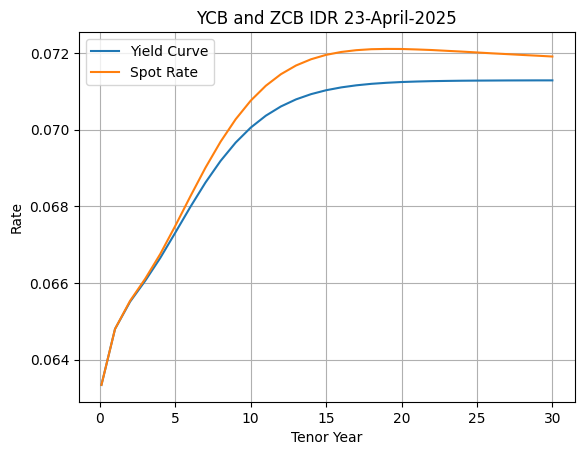

In [17]:
plt.plot(df.index, df['IBPA Yield'], label = 'Yield Curve')
plt.plot(df.index, df['Spot-Rate'], label = 'Spot Rate')
plt.xlabel('Tenor Year')
plt.ylabel('Rate')
plt.legend()
plt.title(f'YCB and ZCB IDR {clean_date}')
plt.grid()
plt.savefig(f'{sub_path_py_image}/{clean_date}.jpeg')
plt.show()

In [18]:
df.to_excel(f'{sub_path}/Yield-Curve-{clean_date}.xlsx', 
            sheet_name=clean_date)

# Saving Corporate Bond Data

In [19]:
corporate_bond = df_list[5].iloc[:,1:-1]
corporate_bond.iloc[:,0] /= 10
corporate_bond.iloc[:,1:] /= 1e6
corporate_bond

/tmp/ipykernel_20073/443847984.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.1
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
Name: Tenor (Year), dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  corporate_bond.iloc[:,0] /= 10
/tmp/ipykernel_20073/443847984.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     0.063339
1     0.064798
2     0.065510
3     0.066054
4     0.066651
5     0.067312
6     0.067984
7     0.068619
8     0.069182
9     0.069660
10    0.070051
Name: IGS, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  corporate_bond.iloc[:,1:] /= 1e6
/tmp/ipykernel_20073/443847984.py:3: FutureWarning: Setting an item of incompatible dtype is deprec

,Tenor (Year),IGS,AAA,AA,A,BBB
0,0.1,0.063339,0.065633,0.068031,0.074619,0.086686
1,1.0,0.064798,0.067475,0.070923,0.084881,0.097858
2,2.0,0.065510,0.068297,0.072514,0.088477,0.103848
3,3.0,0.066054,0.068902,0.073764,0.090735,0.107515
4,4.0,0.066651,0.069625,0.075042,0.092889,0.110354
5,5.0,0.067312,0.070486,0.076342,0.094836,0.112735
6,6.0,0.067984,0.071409,0.077577,0.096402,0.114715
7,7.0,0.068619,0.072312,0.078674,0.097553,0.116301
8,8.0,0.069182,0.073138,0.079598,0.098342,0.117524
9,9.0,0.069660,0.073856,0.080343,0.098858,0.118436


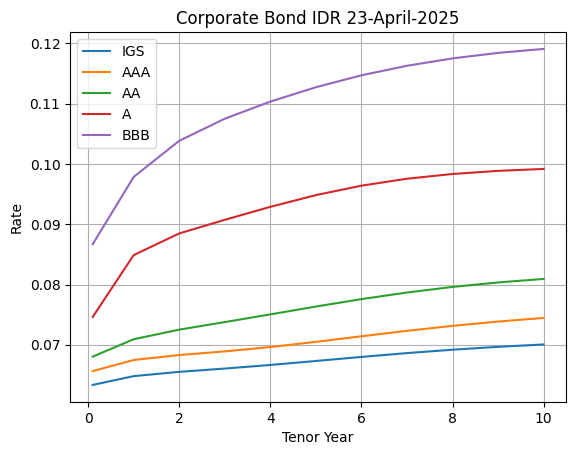

In [20]:
plt.plot(corporate_bond.iloc[:,0], corporate_bond.iloc[:,1:], label = corporate_bond.columns[1:])
plt.legend()
plt.xlabel('Tenor Year')
plt.ylabel('Rate')
plt.title(f'Corporate Bond IDR {clean_date}')
plt.grid()
plt.savefig(f'{sub_path_py_image}/Corporate Bond IDR-{clean_date}.jpeg')
plt.show()

In [21]:
corporate_bond.to_excel(f'{sub_path}/Corporate-Bond-{clean_date}.xlsx', 
            sheet_name=clean_date)